In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori  
from mlxtend.frequent_patterns import association_rules
import csv

In [2]:
#reading the dataset using pandas lib

dataset = pd.read_csv('Courses_Enroll.csv')
dataset.head()

,Student ID,Course Name
0,1,System Administration
1,2,Python Data Structures
2,2,Artificial Intelligence
3,2,Machine Learning
4,2,Introduction to Data Science in Python


In [3]:
Courses={}#empyty

cnt=0
for c in dataset['Course Name']:
    if c  in Courses:
        Courses[c]=Courses[c]+1
    else:
        if(c!='NAN'):
            
            Courses[c]=1
            cnt+=1

In [4]:
Courses

{'System Administration ': 1521,
 'Python Data Structures': 7341,
 'Artificial Intelligence': 7341,
 'Machine Learning': 5871,
 'Introduction to Data Science in Python': 5014,
 'Deep Learning in Python': 5014,
 'Programming with MATLAB': 3007,
 'The Data Scientist�s Toolbox': 3015,
 'C++ For C Programmers': 629,
 'Python and Statistics for Financial Analysis': 629,
 'Introduction to Mathematical Thinking': 1950,
 'Getting and Cleaning Data': 1108,
 'Ruby on Rails': 1100,
 'Introduction to Big Data': 1100,
 'Become a Digital Marketer': 686,
 'Mastering Data Analysis in Excel': 686,
 'Blockchain in Business': 5670,
 'Network Security': 551,
 'Cyberwar, Surveillance and Security': 543,
 'Java Programming': 624,
 'Android App Development': 616,
 'Introduction to iOS App Development': 616,
 'Tables, Data & Networking in iOS': 2499,
 'Introduction to Game Development': 1642,
 'Java Programming: Solving Problems with Software': 1634,
 'Mobile Applications for Android': 1634,
 'Vector Calculus

In [5]:
Course={}

Course={k: v for k, v in sorted(Courses.items(), key=lambda item: item[1])}
Course

{'Java Programming: Solving Problems': 8,
 'Ethical Hacking': 528,
 'Access Controls': 528,
 'Security & Database Vulnerabilities': 528,
 'Cloud Computing Concepts': 528,
 'Principles of Computing': 528,
 'Cyberwar, Surveillance and Security': 543,
 'Network Security': 551,
 'Introduction to Web Development': 593,
 'Introduction to HTML5': 593,
 'Product Strategy': 593,
 'Android App Development': 616,
 'Introduction to iOS App Development': 616,
 'Java Programming': 624,
 'Regression Model': 625,
 'Differential Equations for Engineers': 625,
 'Statistical Inference': 625,
 'Programming Foundations with JavaScript, HTML and CSS': 625,
 'Responsive Web Design': 625,
 'C++ For C Programmers': 629,
 'Python and Statistics for Financial Analysis': 629,
 'Vector Calculus for Engineers': 633,
 'Become a Digital Marketer': 686,
 'Mastering Data Analysis in Excel': 686,
 'Getting and Cleani': 857,
 'Moralities of Everyday Life': 930,
 'Ruby on Rails': 1100,
 'Introduction to Big Data': 1100,
 

In [6]:
keys=[]
vals=[]
for i,k in Course.items():
        keys.append(i)
        vals.append(k)


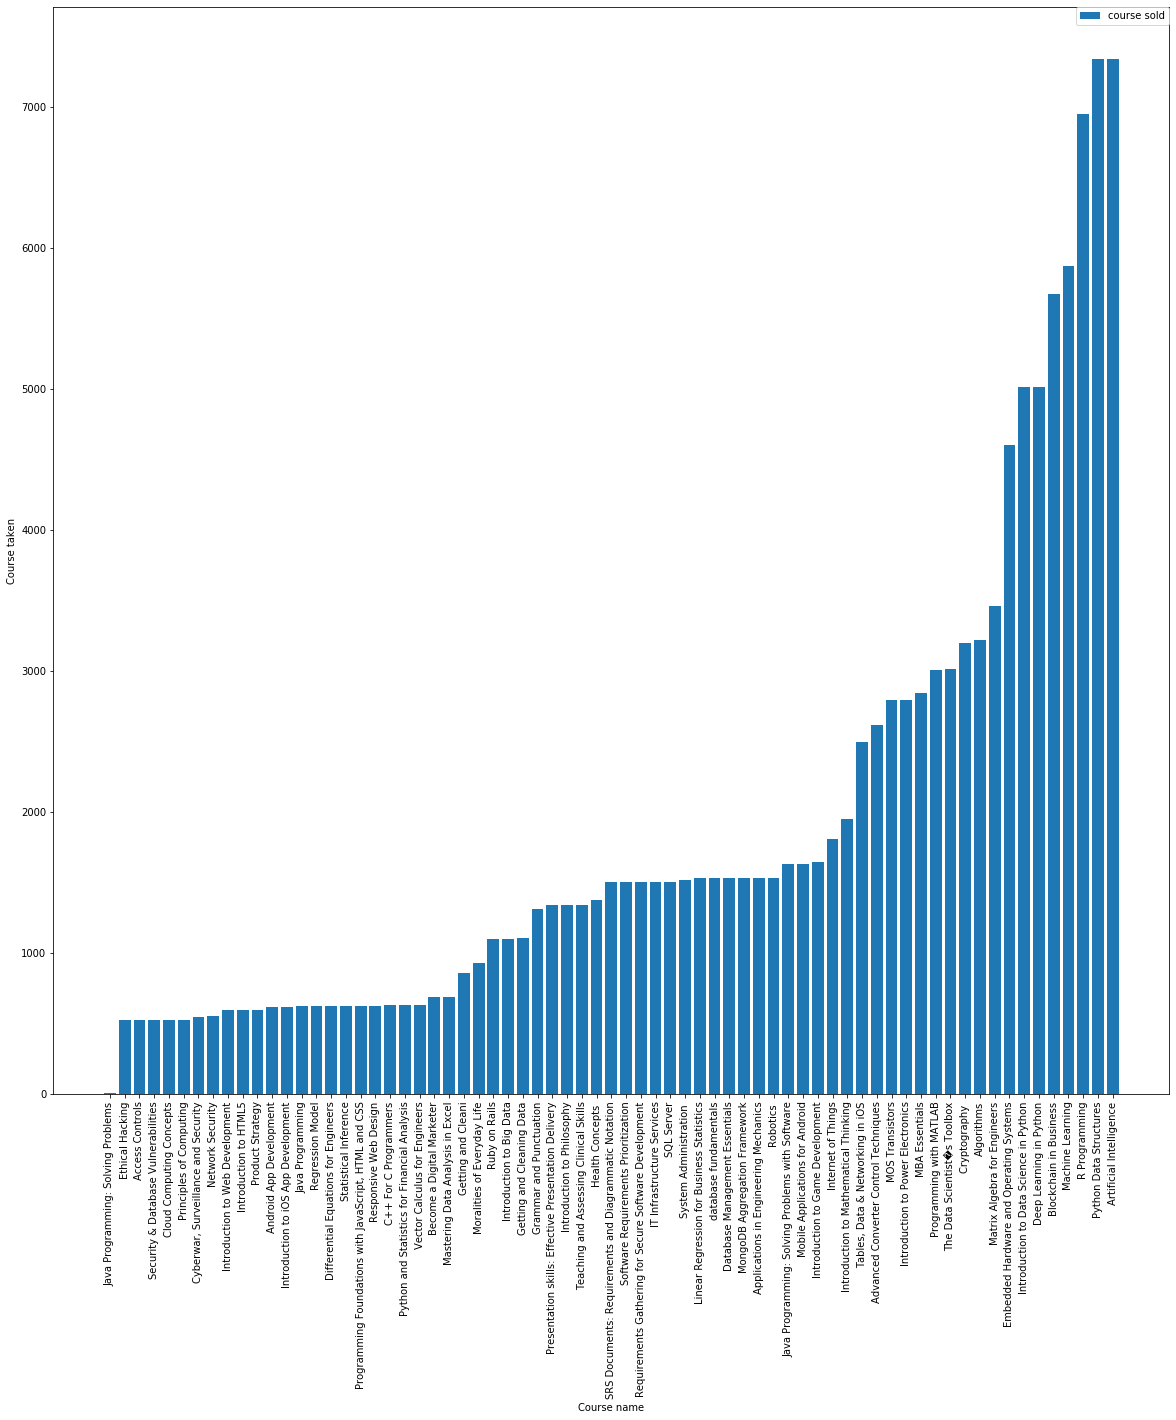

In [8]:
plt.bar(keys, vals, label="course sold")
plt.rcParams["figure.figsize"] = [20,20]
plt.ylabel ('Course taken')
plt.xlabel ('Course name')
plt.xticks(list(keys), rotation=90)
plt.legend (bbox_to_anchor=(1, 1), loc="best", borderaxespad=0.)
plt.show()

In [9]:
dataset['set_bit']=1
dataset.head()

,Student ID,Course Name,set_bit
0,1,System Administration,1
1,2,Python Data Structures,1
2,2,Artificial Intelligence,1
3,2,Machine Learning,1
4,2,Introduction to Data Science in Python,1


In [10]:
#course_items=dataset.groupby(['Student ID','Course Name'])['set_bit'].sum().unstack().fillna(0)
course_items=dataset.groupby(['Student ID','Course Name'])['set_bit'].sum()

In [11]:
course_items

Student ID  Course Name                            
1           System Administration                      1
2           Artificial Intelligence                    1
            Deep Learning in Python                    1
            Introduction to Data Science in Python     1
            Machine Learning                           1
                                                      ..
21680       Advanced Converter Control Techniques      1
            Blockchain in Business                     1
            Deep Learning in Python                    1
            Embedded Hardware and Operating Systems    1
            Introduction to Power Electronics          1
Name: set_bit, Length: 124250, dtype: int64

In [12]:
course_items=course_items.unstack()
course_items

Course Name,Access Controls,Advanced Converter Control Techniques,Algorithms,Android App Development,Applications in Engineering Mechanics,Artificial Intelligence,Become a Digital Marketer,Blockchain in Business,C++ For C Programmers,Cloud Computing Concepts,...,SRS Documents: Requirements and Diagrammatic Notation,Security & Database Vulnerabilities,Software Requirements Prioritization,Statistical Inference,System Administration,"Tables, Data & Networking in iOS",Teaching and Assessing Clinical Skills,The Data Scientist�s Toolbox,Vector Calculus for Engineers,database fundamentals
Student ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21677,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
21678,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
course_items=course_items.fillna(0)

In [14]:
course_items

Course Name,Access Controls,Advanced Converter Control Techniques,Algorithms,Android App Development,Applications in Engineering Mechanics,Artificial Intelligence,Become a Digital Marketer,Blockchain in Business,C++ For C Programmers,Cloud Computing Concepts,...,SRS Documents: Requirements and Diagrammatic Notation,Security & Database Vulnerabilities,Software Requirements Prioritization,Statistical Inference,System Administration,"Tables, Data & Networking in iOS",Teaching and Assessing Clinical Skills,The Data Scientist�s Toolbox,Vector Calculus for Engineers,database fundamentals
Student ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21677,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21678,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1


In [16]:
course_items_sets = course_items.applymap(encode_units)


In [17]:
course_items_sets

Course Name,Access Controls,Advanced Converter Control Techniques,Algorithms,Android App Development,Applications in Engineering Mechanics,Artificial Intelligence,Become a Digital Marketer,Blockchain in Business,C++ For C Programmers,Cloud Computing Concepts,...,SRS Documents: Requirements and Diagrammatic Notation,Security & Database Vulnerabilities,Software Requirements Prioritization,Statistical Inference,System Administration,"Tables, Data & Networking in iOS",Teaching and Assessing Clinical Skills,The Data Scientist�s Toolbox,Vector Calculus for Engineers,database fundamentals
Student ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21676,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21677,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21678,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
frequent_course=apriori(course_items_sets,min_support=0.2, use_colnames=True)
frequent_course

,support,itemsets
0,0.315867,(Artificial Intelligence)
1,0.237131,(Blockchain in Business)
2,0.226983,(Deep Learning in Python)
3,0.227168,(Introduction to Data Science in Python)
4,0.264991,(Machine Learning)
5,0.316974,(Python Data Structures)
6,0.265406,(R Programming)
7,0.271172,"(Python Data Structures, Artificial Intelligence)"


In [19]:
rules = association_rules(frequent_course, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Python Data Structures),(Artificial Intelligence),0.316974,0.315867,0.271172,0.855501,2.708419,0.17105,4.734502
1,(Artificial Intelligence),(Python Data Structures),0.315867,0.316974,0.271172,0.858499,2.708419,0.17105,4.826998
